In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


###  https://www.kaggle.com/omnamahshivai/surgical-dataset-binary-classification

In [2]:
df = pd.read_csv('Surgical-deepnet.csv')
df.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 25 columns):
bmi                    14635 non-null float64
Age                    14635 non-null float64
asa_status             14635 non-null int64
baseline_cancer        14635 non-null int64
baseline_charlson      14635 non-null int64
baseline_cvd           14635 non-null int64
baseline_dementia      14635 non-null int64
baseline_diabetes      14635 non-null int64
baseline_digestive     14635 non-null int64
baseline_osteoart      14635 non-null int64
baseline_psych         14635 non-null int64
baseline_pulmonary     14635 non-null int64
ahrq_ccs               14635 non-null int64
ccsComplicationRate    14635 non-null float64
ccsMort30Rate          14635 non-null float64
complication_rsi       14635 non-null float64
dow                    14635 non-null int64
gender                 14635 non-null int64
hour                   14635 non-null float64
month                  14635 non-null int64

In [4]:
labels = df['complication'] # y  - целевой признак
features = df.drop('complication', 1) # X -  матрица признаков
features.shape, labels.shape

((14635, 24), (14635,))

In [5]:
from sklearn.model_selection import train_test_split 
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state = 42)
features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

((11708, 24), (2927, 24), (11708,), (2927,))

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
%%time
feat_labels = df.columns[1:]

forest = RandomForestClassifier(n_estimators=1000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(features_train, labels_train)

Wall time: 3.84 s


 1) asa_status                     0.215494
 2) dow                            0.116529
 3) race                           0.107071
 4) Age                            0.099976
 5) ccsMort30Rate                  0.071420
 6) month                          0.069473
 7) moonphase                      0.046906
 8) complication_rsi               0.044517
 9) ccsComplicationRate            0.035763
10) gender                         0.032305
11) mort30                         0.029112
12) baseline_cvd                   0.025214
13) baseline_cancer                0.015566
14) baseline_psych                 0.013085
15) complication                   0.011968
16) baseline_dementia              0.011594
17) baseline_osteoart              0.011075
18) hour                           0.010977
19) baseline_charlson              0.009001
20) baseline_digestive             0.008028
21) baseline_pulmonary             0.006916
22) ahrq_ccs                       0.006304
23) baseline_diabetes           

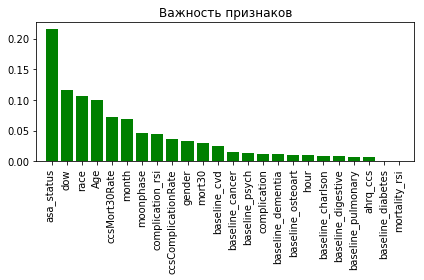

In [8]:
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(features_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Важность признаков')
plt.bar(range(features_train.shape[1]), 
        importances[indices],
        color='green', 
        align='center')

plt.xticks(range(features_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, features_train.shape[1]])
plt.tight_layout()
plt.savefig('random_forest.png', dpi=300)
plt.show()

In [9]:
accuracy_score(forest.predict(features_test), labels_test)

0.8701742398360096

In [10]:
print(classification_report(labels_test, forest.predict(features_test)))

             precision    recall  f1-score   support

          0       0.89      0.95      0.92      2237
          1       0.79      0.61      0.69       690

avg / total       0.86      0.87      0.86      2927



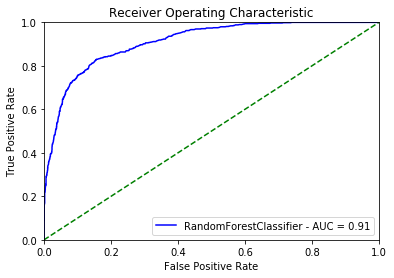

In [11]:
y_pred_rf = forest.predict_proba(features_test)[:,1]
fpr, tpr, thresholds = roc_curve(labels_test, y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'RandomForestClassifier - AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [13]:
select.fit(features_train, labels_train)
X_train_l1 = select.transform(features_train)
print("X_train.shape: {}".format(features_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (11708, 24)
X_train_l1.shape: (11708, 12)


### Признаки, отобранные SelectFromModel с помощью RandomForestClassifier

([], <a list of 0 Text yticklabel objects>)

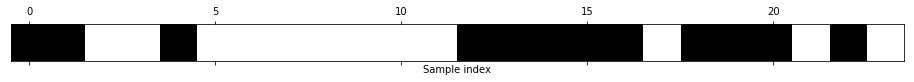

In [14]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

### Признаки, отобранные методом рекурсивного исключения признаков с помощью RandomForestClassifier

([], <a list of 0 Text yticklabel objects>)

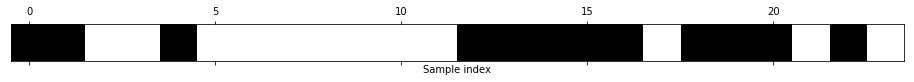

In [15]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=12)

select.fit(features_train, labels_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [16]:
print("Test score: {:.3f}".format(select.score(features_test, labels_test)))

Test score: 0.889


In [17]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit( features_train, labels_train );
accuracy_score(tree.predict(features_test), labels_test)

0.848650495387769

In [18]:
print(classification_report(labels_test, tree.predict(features_test)))

             precision    recall  f1-score   support

          0       0.86      0.96      0.91      2237
          1       0.78      0.50      0.61       690

avg / total       0.84      0.85      0.84      2927



In [19]:
tree_params = {'max_depth': np.arange(5,10), 
               'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1]}
tree_grid = GridSearchCV(tree, tree_params, 
                         cv=5, 
                         n_jobs=-1)
tree_grid.fit(features_train, labels_train);

In [20]:
tree_grid.best_score_, tree_grid.best_params_

(0.8853775196446874, {'max_depth': 9, 'max_features': 0.9})

In [21]:
#
# forest_params = {'max_depth': np.arange(5,10), 
#                'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1]}
# forest_grid = GridSearchCV(forest, forest_params, 
#                          cv=5, 
#                          n_jobs=-1)
# forest_grid.fit(features_train, labels_train);

In [22]:
# forest_grid.best_score_, forest_grid.best_params_

In [23]:
print(tree_grid.cv_results_)

{'mean_fit_time': array([0.01620102, 0.01840105, 0.02140121, 0.02960172, 0.03300185,
       0.00700049, 0.02060118, 0.02560158, 0.0260015 , 0.03180189,
       0.03860216, 0.00940056, 0.02840166, 0.03460193, 0.04320245,
       0.04940281, 0.06560378, 0.01180072, 0.03680224, 0.0450026 ,
       0.0470027 , 0.05420303, 0.0598033 , 0.01380081, 0.0470027 ,
       0.04620275, 0.04680266, 0.04480262, 0.04420242, 0.01220059]), 'std_fit_time': array([0.00039995, 0.00135651, 0.00249806, 0.00407935, 0.00400028,
       0.00126501, 0.0020591 , 0.00338238, 0.00451689, 0.00444543,
       0.00320015, 0.0010199 , 0.00546303, 0.00403002, 0.00696892,
       0.00293957, 0.02476122, 0.00097975, 0.00193917, 0.00424286,
       0.00063249, 0.00172047, 0.00231525, 0.00614537, 0.00905588,
       0.00552845, 0.0082322 , 0.00910884, 0.01068513, 0.00097986]), 'mean_score_time': array([0.00120006, 0.00180011, 0.00120015, 0.00100002, 0.00140014,
       0.00140004, 0.00120006, 0.00140009, 0.00100007, 0.0012001 ,
     

In [24]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(tree_grid.cv_results_)
# show the first 5 rows
display(results.head())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.016201,0.0012,0.813119,0.823753,5,0.5,"{'max_depth': 5, 'max_features': 0.5}",25,0.810845,0.825432,...,0.800598,0.826287,0.816318,0.821501,0.810337,0.819152,0.000400,4.001379e-04,0.008795,0.002914
1,0.018401,0.0018,0.821063,0.827831,5,0.6,"{'max_depth': 5, 'max_features': 0.6}",22,0.805722,0.817745,...,0.802733,0.831625,0.844084,0.843173,0.821871,0.821715,0.001357,4.000902e-04,0.015485,0.008916
2,0.021401,0.0012,0.819098,0.824927,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",24,0.812126,0.825966,...,0.796755,0.827568,0.811192,0.804847,0.844511,0.840717,0.002498,4.000903e-04,0.016707,0.011498
3,0.029602,0.0010,0.822600,0.826572,5,0.8,"{'max_depth': 5, 'max_features': 0.8}",21,0.823228,0.833013,...,0.806576,0.831625,0.825716,0.820006,0.826997,0.826519,0.004079,1.168008e-07,0.008348,0.005175
4,0.033002,0.0014,0.827127,0.834387,5,0.9,"{'max_depth': 5, 'max_features': 0.9}",19,0.831341,0.846893,...,0.808284,0.833013,0.823580,0.824277,0.843229,0.843173,0.004000,4.899598e-04,0.011393,0.009316


In [25]:
results.head(30)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.016201,0.0012,0.813119,0.823753,5,0.5,"{'max_depth': 5, 'max_features': 0.5}",25,0.810845,0.825432,...,0.800598,0.826287,0.816318,0.821501,0.810337,0.819152,0.000400,4.001379e-04,0.008795,0.002914
1,0.018401,0.0018,0.821063,0.827831,5,0.6,"{'max_depth': 5, 'max_features': 0.6}",22,0.805722,0.817745,...,0.802733,0.831625,0.844084,0.843173,0.821871,0.821715,0.001357,4.000902e-04,0.015485,0.008916
2,0.021401,0.0012,0.819098,0.824927,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",24,0.812126,0.825966,...,0.796755,0.827568,0.811192,0.804847,0.844511,0.840717,0.002498,4.000903e-04,0.016707,0.011498
3,0.029602,0.0010,0.822600,0.826572,5,0.8,"{'max_depth': 5, 'max_features': 0.8}",21,0.823228,0.833013,...,0.806576,0.831625,0.825716,0.820006,0.826997,0.826519,0.004079,1.168008e-07,0.008348,0.005175
4,0.033002,0.0014,0.827127,0.834387,5,0.9,"{'max_depth': 5, 'max_features': 0.9}",19,0.831341,0.846893,...,0.808284,0.833013,0.823580,0.824277,0.843229,0.843173,0.004000,4.899598e-04,0.011393,0.009316
5,0.007000,0.0014,0.769388,0.770841,5,1,"{'max_depth': 5, 'max_features': 1}",30,0.780956,0.785714,...,0.766012,0.773863,0.765912,0.763211,0.760359,0.755525,0.001265,4.900376e-04,0.007175,0.010475
6,0.020601,0.0012,0.820806,0.833703,6,0.5,"{'max_depth': 6, 'max_features': 0.5}",23,0.796328,0.819133,...,0.802733,0.830237,0.827851,0.832711,0.847928,0.855236,0.002059,4.000187e-04,0.018876,0.011792
7,0.025602,0.0014,0.830287,0.840024,6,0.6,"{'max_depth': 6, 'max_features': 0.6}",18,0.821947,0.840807,...,0.809991,0.835362,0.842375,0.843707,0.847501,0.851927,0.003382,4.899014e-04,0.013596,0.007933
8,0.026002,0.0010,0.822856,0.832294,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",20,0.828779,0.831625,...,0.805295,0.837924,0.818026,0.819046,0.838103,0.841892,0.004517,1.907349e-07,0.010962,0.007765
9,0.031802,0.0012,0.831995,0.840280,6,0.8,"{'max_depth': 6, 'max_features': 0.8}",16,0.820666,0.837604,...,0.833476,0.852872,0.827851,0.836020,0.831696,0.830362,0.004445,3.999949e-04,0.008391,0.007751


In [26]:
scores = np.array(results.mean_test_score).reshape(6, 5)
scores

array([[0.81311923, 0.82106252, 0.81909805, 0.82259993, 0.82712675],
       [0.76938845, 0.82080629, 0.83028698, 0.82285617, 0.83199522],
       [0.83532627, 0.77143833, 0.83088487, 0.83276392, 0.83242228],
       [0.83780321, 0.84984626, 0.78211479, 0.83669286, 0.85018791],
       [0.8552272 , 0.8574479 , 0.86274342, 0.77007175, 0.8545439 ],
       [0.85830202, 0.85710625, 0.86974718, 0.88537752, 0.77741715]])

In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

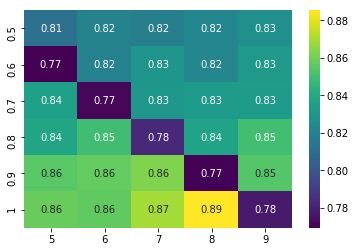

In [28]:
# plot the mean cross-validation scores
sns.heatmap(scores, 
#             x_label='max_features', 
            xticklabels=tree_params['max_depth'],
#                       ylabel='max_depth', 
            yticklabels=tree_params['max_features'], 
            cmap="viridis",
#              square=True,
            annot=True
           )